## Group Assignment # 2

Our project proposal looks at the correlation between proximity to freeways and hospitalization rates. In addition to looking at pollutants and hospitalization rates as they relate to their proximity near the frewway, we wanted to look at additional factors contributing to living near or away from a freeway. For that we need to look at demographics, so for this assignment, I will be looking at the household income profile in Los Angeles Cityy from 2015 to 2019, according to the U.S. Census Bureau. 

Author: Nour Aboufadel

First, I will uplpad the following libraries to my notebook: pandas, geopandas, contextily, and matplot.

In [36]:
import pandas as pd

In [37]:
import geopandas as gpd

In [38]:
import contextily as ctx

In [39]:
import matplotlib.pyplot as plt

Second, I will import my data in Geojson format. 

In [40]:
gdf = gpd.read_file('acs2019_5yr_B19001_14000US06037293306.geojson')

Now, I want to take a look at my data and explore it.

In [41]:
gdf.shape

(1004, 37)

So, this data has 1004 rows and 37 columns. To take a look at what these rows and columns are, I will use the gdf.head() code. 

In [42]:
gdf.head()

,geoid,name,B19001001,"B19001001, Error",B19001002,"B19001002, Error",B19001003,"B19001003, Error",B19001004,"B19001004, Error",B19001005,"B19001005, Error",B19001006,"B19001006, Error",B19001007,"B19001007, Error",B19001008,"B19001008, Error",B19001009,"B19001009, Error",B19001010,"B19001010, Error",B19001011,"B19001011, Error",B19001012,"B19001012, Error",B19001013,"B19001013, Error",B19001014,"B19001014, Error",B19001015,"B19001015, Error",B19001016,"B19001016, Error",B19001017,"B19001017, Error",geometry
0,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",1575.0,90.0,86.0,71.0,91.0,65.0,101.0,68.0,44.0,41.0,55.0,45.0,78.0,67.0,67.0,56.0,46.0,37.0,99.0,53.0,99.0,56.0,107.0,56.0,274.0,103.0,151.0,60.0,75.0,48.0,125.0,73.0,77.0,40.0,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009..."
1,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",1312.0,63.0,66.0,52.0,21.0,22.0,0.0,12.0,47.0,48.0,36.0,43.0,25.0,27.0,7.0,11.0,0.0,12.0,52.0,52.0,34.0,25.0,166.0,90.0,298.0,116.0,119.0,63.0,146.0,73.0,115.0,55.0,180.0,74.0,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033..."
2,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",2297.0,98.0,271.0,127.0,135.0,69.0,278.0,112.0,39.0,41.0,108.0,76.0,169.0,109.0,112.0,74.0,53.0,47.0,178.0,96.0,163.0,78.0,165.0,79.0,261.0,119.0,148.0,96.0,106.0,65.0,53.0,51.0,58.0,59.0,"MULTIPOLYGON (((-118.29945 34.25598, -118.2979..."
3,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",1357.0,57.0,85.0,53.0,128.0,59.0,124.0,64.0,57.0,41.0,35.0,31.0,94.0,53.0,83.0,42.0,107.0,56.0,83.0,56.0,84.0,43.0,63.0,35.0,122.0,59.0,114.0,51.0,68.0,44.0,69.0,47.0,41.0,32.0,"MULTIPOLYGON (((-118.28593 34.25227, -118.2859..."
4,14000US06037101300,"Census Tract 1013, Los Angeles, CA",1445.0,93.0,78.0,50.0,18.0,19.0,59.0,60.0,33.0,26.0,68.0,48.0,33.0,42.0,17.0,19.0,83.0,56.0,32.0,26.0,86.0,50.0,147.0,65.0,195.0,71.0,137.0,59.0,122.0,47.0,159.0,72.0,178.0,77.0,"MULTIPOLYGON (((-118.27822 34.25068, -118.2782..."


In order to look at all my columns, I will use the 'display max' code.

In [43]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [44]:
gdf.head()

,geoid,name,B19001001,"B19001001, Error",B19001002,"B19001002, Error",B19001003,"B19001003, Error",B19001004,"B19001004, Error",B19001005,"B19001005, Error",B19001006,"B19001006, Error",B19001007,"B19001007, Error",B19001008,"B19001008, Error",B19001009,"B19001009, Error",B19001010,"B19001010, Error",B19001011,"B19001011, Error",B19001012,"B19001012, Error",B19001013,"B19001013, Error",B19001014,"B19001014, Error",B19001015,"B19001015, Error",B19001016,"B19001016, Error",B19001017,"B19001017, Error",geometry
0,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",1575.0,90.0,86.0,71.0,91.0,65.0,101.0,68.0,44.0,41.0,55.0,45.0,78.0,67.0,67.0,56.0,46.0,37.0,99.0,53.0,99.0,56.0,107.0,56.0,274.0,103.0,151.0,60.0,75.0,48.0,125.0,73.0,77.0,40.0,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009..."
1,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",1312.0,63.0,66.0,52.0,21.0,22.0,0.0,12.0,47.0,48.0,36.0,43.0,25.0,27.0,7.0,11.0,0.0,12.0,52.0,52.0,34.0,25.0,166.0,90.0,298.0,116.0,119.0,63.0,146.0,73.0,115.0,55.0,180.0,74.0,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033..."
2,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",2297.0,98.0,271.0,127.0,135.0,69.0,278.0,112.0,39.0,41.0,108.0,76.0,169.0,109.0,112.0,74.0,53.0,47.0,178.0,96.0,163.0,78.0,165.0,79.0,261.0,119.0,148.0,96.0,106.0,65.0,53.0,51.0,58.0,59.0,"MULTIPOLYGON (((-118.29945 34.25598, -118.2979..."
3,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",1357.0,57.0,85.0,53.0,128.0,59.0,124.0,64.0,57.0,41.0,35.0,31.0,94.0,53.0,83.0,42.0,107.0,56.0,83.0,56.0,84.0,43.0,63.0,35.0,122.0,59.0,114.0,51.0,68.0,44.0,69.0,47.0,41.0,32.0,"MULTIPOLYGON (((-118.28593 34.25227, -118.2859..."
4,14000US06037101300,"Census Tract 1013, Los Angeles, CA",1445.0,93.0,78.0,50.0,18.0,19.0,59.0,60.0,33.0,26.0,68.0,48.0,33.0,42.0,17.0,19.0,83.0,56.0,32.0,26.0,86.0,50.0,147.0,65.0,195.0,71.0,137.0,59.0,122.0,47.0,159.0,72.0,178.0,77.0,"MULTIPOLYGON (((-118.27822 34.25068, -118.2782..."


Now I see all 37 columns. 

Looking at the data types:

In [45]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1004 entries, 0 to 1003
Data columns (total 37 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   geoid             1004 non-null   object  
 1   name              1004 non-null   object  
 2   B19001001         1004 non-null   float64 
 3   B19001001, Error  1004 non-null   float64 
 4   B19001002         1004 non-null   float64 
 5   B19001002, Error  1004 non-null   float64 
 6   B19001003         1004 non-null   float64 
 7   B19001003, Error  1004 non-null   float64 
 8   B19001004         1004 non-null   float64 
 9   B19001004, Error  1004 non-null   float64 
 10  B19001005         1004 non-null   float64 
 11  B19001005, Error  1004 non-null   float64 
 12  B19001006         1004 non-null   float64 
 13  B19001006, Error  1004 non-null   float64 
 14  B19001007         1004 non-null   float64 
 15  B19001007, Error  1004 non-null   float64 
 16  B19001008       

Now I want to identify my columns.

In [46]:
list(gdf)

['geoid',
 'name',
 'B19001001',
 'B19001001, Error',
 'B19001002',
 'B19001002, Error',
 'B19001003',
 'B19001003, Error',
 'B19001004',
 'B19001004, Error',
 'B19001005',
 'B19001005, Error',
 'B19001006',
 'B19001006, Error',
 'B19001007',
 'B19001007, Error',
 'B19001008',
 'B19001008, Error',
 'B19001009',
 'B19001009, Error',
 'B19001010',
 'B19001010, Error',
 'B19001011',
 'B19001011, Error',
 'B19001012',
 'B19001012, Error',
 'B19001013',
 'B19001013, Error',
 'B19001014',
 'B19001014, Error',
 'B19001015',
 'B19001015, Error',
 'B19001016',
 'B19001016, Error',
 'B19001017',
 'B19001017, Error',
 'geometry']

Based on my metadata.json, I know which columns I need to keep.

In [47]:
columns_to_keep = ['geoid',
 'name',
 'B19001001',
 'B19001002',
 'B19001003',
 'B19001004',
 'B19001005',
 'B19001006',
 'B19001007',
 'B19001008',
 'B19001009',
 'B19001010',
 'B19001011',
 'B19001012',
 'B19001013',
 'B19001014',
 'B19001015',
 'B19001016',
 'B19001017',
 'geometry']

In [48]:
gdf = gdf[columns_to_keep]

In [49]:
gdf.head()

,geoid,name,B19001001,B19001002,B19001003,B19001004,B19001005,B19001006,B19001007,B19001008,B19001009,B19001010,B19001011,B19001012,B19001013,B19001014,B19001015,B19001016,B19001017,geometry
0,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",1575.0,86.0,91.0,101.0,44.0,55.0,78.0,67.0,46.0,99.0,99.0,107.0,274.0,151.0,75.0,125.0,77.0,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009..."
1,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",1312.0,66.0,21.0,0.0,47.0,36.0,25.0,7.0,0.0,52.0,34.0,166.0,298.0,119.0,146.0,115.0,180.0,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033..."
2,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",2297.0,271.0,135.0,278.0,39.0,108.0,169.0,112.0,53.0,178.0,163.0,165.0,261.0,148.0,106.0,53.0,58.0,"MULTIPOLYGON (((-118.29945 34.25598, -118.2979..."
3,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",1357.0,85.0,128.0,124.0,57.0,35.0,94.0,83.0,107.0,83.0,84.0,63.0,122.0,114.0,68.0,69.0,41.0,"MULTIPOLYGON (((-118.28593 34.25227, -118.2859..."
4,14000US06037101300,"Census Tract 1013, Los Angeles, CA",1445.0,78.0,18.0,59.0,33.0,68.0,33.0,17.0,83.0,32.0,86.0,147.0,195.0,137.0,122.0,159.0,178.0,"MULTIPOLYGON (((-118.27822 34.25068, -118.2782..."


Based on the information from my metadat.json, I will rename my columns.

In [50]:
list(gdf)

['geoid',
 'name',
 'B19001001',
 'B19001002',
 'B19001003',
 'B19001004',
 'B19001005',
 'B19001006',
 'B19001007',
 'B19001008',
 'B19001009',
 'B19001010',
 'B19001011',
 'B19001012',
 'B19001013',
 'B19001014',
 'B19001015',
 'B19001016',
 'B19001017',
 'geometry']

In [51]:
gdf.columns=['geoid',
 'name',
 'Total',
 'Less than $10,000',
 '$10,000 to $14,999',
 '$15,000 to $19,999',
 '$20,000 to $24,999',
 '$25,000 to $29,999',
 '$30,000 to $34,999',
 '$35,000 to $39,999',
 '$40,000 to $44,999',
 '$45,000 to $49,999',
 '$50,000 to $59,999',
 '$60,000 to $74,999',
 '$75,000 to $99,999',
 '$100,000 to $124,999',
 '$125,000 to $149,999',
 '$150,000 to $199,999',
 '$200,000 or more',
 'geometry']

In [52]:
gdf.head()

,geoid,name,Total,"Less than $10,000","$10,000 to $14,999","$15,000 to $19,999","$20,000 to $24,999","$25,000 to $29,999","$30,000 to $34,999","$35,000 to $39,999","$40,000 to $44,999","$45,000 to $49,999","$50,000 to $59,999","$60,000 to $74,999","$75,000 to $99,999","$100,000 to $124,999","$125,000 to $149,999","$150,000 to $199,999","$200,000 or more",geometry
0,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",1575.0,86.0,91.0,101.0,44.0,55.0,78.0,67.0,46.0,99.0,99.0,107.0,274.0,151.0,75.0,125.0,77.0,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009..."
1,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",1312.0,66.0,21.0,0.0,47.0,36.0,25.0,7.0,0.0,52.0,34.0,166.0,298.0,119.0,146.0,115.0,180.0,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033..."
2,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",2297.0,271.0,135.0,278.0,39.0,108.0,169.0,112.0,53.0,178.0,163.0,165.0,261.0,148.0,106.0,53.0,58.0,"MULTIPOLYGON (((-118.29945 34.25598, -118.2979..."
3,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",1357.0,85.0,128.0,124.0,57.0,35.0,94.0,83.0,107.0,83.0,84.0,63.0,122.0,114.0,68.0,69.0,41.0,"MULTIPOLYGON (((-118.28593 34.25227, -118.2859..."
4,14000US06037101300,"Census Tract 1013, Los Angeles, CA",1445.0,78.0,18.0,59.0,33.0,68.0,33.0,17.0,83.0,32.0,86.0,147.0,195.0,137.0,122.0,159.0,178.0,"MULTIPOLYGON (((-118.27822 34.25068, -118.2782..."


I want to check if my columns add up.

In [53]:
random_tract=gdf.sample()
random_tract

,geoid,name,Total,"Less than $10,000","$10,000 to $14,999","$15,000 to $19,999","$20,000 to $24,999","$25,000 to $29,999","$30,000 to $34,999","$35,000 to $39,999","$40,000 to $44,999","$45,000 to $49,999","$50,000 to $59,999","$60,000 to $74,999","$75,000 to $99,999","$100,000 to $124,999","$125,000 to $149,999","$150,000 to $199,999","$200,000 or more",geometry
954,14000US06037294301,"Census Tract 2943.01, Los Angeles, CA",688.0,20.0,18.0,15.0,0.0,82.0,34.0,42.0,37.0,30.0,19.0,108.0,44.0,60.0,72.0,87.0,20.0,"MULTIPOLYGON (((-118.28655 33.79764, -118.2857..."


In [54]:
random_tract.iloc[0]['Total']

688.0

In [55]:
print(random_tract.iloc[0]['Less than $10,000'] + 
      random_tract.iloc[0]['$10,000 to $14,999'] + 
      random_tract.iloc[0]['$15,000 to $19,999'] + 
      random_tract.iloc[0]['$20,000 to $24,999'] + 
      random_tract.iloc[0]['$25,000 to $29,999'] + 
      random_tract.iloc[0]['$30,000 to $34,999'] + 
      random_tract.iloc[0]['$35,000 to $39,999'] + 
      random_tract.iloc[0]['$40,000 to $44,999'] +
      random_tract.iloc[0]['$45,000 to $49,999'] +
      random_tract.iloc[0]['$50,000 to $59,999'] +
      random_tract.iloc[0]['$60,000 to $74,999'] +
      random_tract.iloc[0]['$75,000 to $99,999'] +
      random_tract.iloc[0]['$100,000 to $124,999'] +
      random_tract.iloc[0]['$125,000 to $149,999'] +
      random_tract.iloc[0]['$150,000 to $199,999'] +
      random_tract.iloc[0]['$200,000 or more'])

688.0


Performing simple statistics and plots: 

In [56]:
gdf['Total'].head()

0    1575.0
1    1312.0
2    2297.0
3    1357.0
4    1445.0
Name: Total, dtype: float64

In [57]:
gdf['Total'].describe()

count    1004.000000
mean     1380.126494
std       570.323718
min         0.000000
25%       999.000000
50%      1313.000000
75%      1646.000000
max      5663.000000
Name: Total, dtype: float64

<AxesSubplot:ylabel='Frequency'>

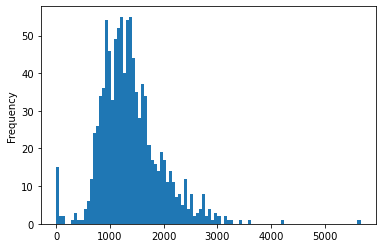

In [58]:
gdf['Total'].plot.hist(bins=100)

Now I want to sort my data by total population

In [59]:
gdf_sorted = gdf.sort_values(by='Total',ascending= False)

In [60]:
gdf_sorted[['geoid','Total']].head(5)

,geoid,Total
922,14000US06037275602,5663.0
546,14000US06037207900,4204.0
540,14000US06037207301,3608.0
541,14000US06037207302,3401.0
545,14000US06037207710,3259.0


### Plot it

<AxesSubplot:>

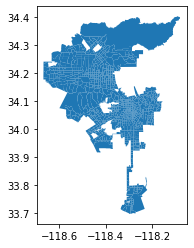

In [61]:
gdf_sorted.head(1000).plot()

<AxesSubplot:>

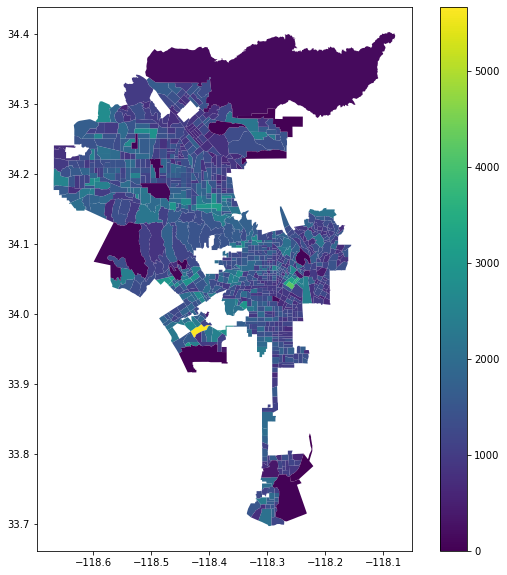

In [62]:
gdf_sorted.head(1000).plot(figsize=(10,10),column= 'Total', legend = True) 

In [63]:
gdf_no_pop = gdf[gdf['Total'] ==0]

In [64]:
print('There are' + str(len(gdf_no_pop)) + 'census tracts with no people in them')

There are7census tracts with no people in them


### Normalize data

Present data as percentage

In [65]:
list(gdf)

['geoid',
 'name',
 'Total',
 'Less than $10,000',
 '$10,000 to $14,999',
 '$15,000 to $19,999',
 '$20,000 to $24,999',
 '$25,000 to $29,999',
 '$30,000 to $34,999',
 '$35,000 to $39,999',
 '$40,000 to $44,999',
 '$45,000 to $49,999',
 '$50,000 to $59,999',
 '$60,000 to $74,999',
 '$75,000 to $99,999',
 '$100,000 to $124,999',
 '$125,000 to $149,999',
 '$150,000 to $199,999',
 '$200,000 or more',
 'geometry']

In [85]:
gdf['Percent Less than $10,000'] = gdf['Less than $10,000']/gdf['Total']*100
gdf['Percent $10,000 to $14,999'] = gdf['$10,000 to $14,999']/gdf['Total']*100
gdf['Percent $15,000 to $19,999'] = gdf['$15,000 to $19,999']/gdf['Total']*100
gdf['Percent $20,000 to $24,999'] = gdf['$20,000 to $24,999']/gdf['Total']*100 
gdf['Percent $25,000 to $29,999'] = gdf['$25,000 to $29,999']/gdf['Total']*100 
gdf['Percent $30,000 to $34,999'] = gdf['$30,000 to $34,999']/gdf['Total']*100
gdf['Percent $35,000 to $39,999'] = gdf['$35,000 to $39,999']/gdf['Total']*100
gdf['Percent $40,000 to $44,999'] = gdf['$40,000 to $44,999']/gdf['Total']*100
gdf['Percent $45,000 to $49,999'] = gdf['$45,000 to $49,999']/gdf['Total']*100
gdf['Percent $50,000 to $59,999'] = gdf['$50,000 to $59,999']/gdf['Total']*100
gdf['Percent $60,000 to $74,999'] = gdf['$60,000 to $74,999']/gdf['Total']*100  
gdf['Percent $75,000 to $99,999'] = gdf['$75,000 to $99,999']/gdf['Total']*100
gdf['Percent $100,000 to $124,999'] = gdf['$100,000 to $124,999']/gdf['Total']*100
gdf['Percent $125,000 to $149,999'] = gdf['$125,000 to $149,999']/gdf['Total']*100
gdf['Percent $150,000 to $199,999'] = gdf['$150,000 to $199,999']/gdf['Total']*100  
gdf['Percent $200,000 or more'] = gdf['$200,000 or more']/gdf['Total']*100

In [86]:
gdf.sample()

,geoid,name,Total,"Less than $10,000","$10,000 to $14,999","$15,000 to $19,999","$20,000 to $24,999","$25,000 to $29,999","$30,000 to $34,999","$35,000 to $39,999","$40,000 to $44,999","$45,000 to $49,999","$50,000 to $59,999","$60,000 to $74,999","$75,000 to $99,999","$100,000 to $124,999","$125,000 to $149,999","$150,000 to $199,999","$200,000 or more",geometry,"Percent Less than $10,000","Percent $15,000 to $19,999","Percent $20,000 to $24,999","Percent $30,000 to $34,999","Percent $40,000 to $44,999","Percent $50,000 to $59,999","Percent $60,000 to $74,999","Percent $75,000 to $99,999","Percent $100,000 to $124,999","Percent $125,000 to $149,999","Percent $150,000 to $199,999","Percent $200,000 or more","Percent Less than $24,999","Percent $30,000 to $59,999","Percent $60,000 to $99,999","Percent $100,000 to $199,999","Percent $10,000 to $14,999","Percent $25,000 to $29,999","Percent $35,000 to $39,999","Percent $45,000 to $49,999"
219,14000US06037127300,"Census Tract 1273, Los Angeles, CA",1375.0,37.0,77.0,93.0,45.0,157.0,151.0,46.0,8.0,76.0,73.0,118.0,178.0,80.0,85.0,78.0,73.0,"MULTIPOLYGON (((-118.47336 34.20130, -118.4732...",2.690909,6.763636,3.272727,10.981818,0.581818,5.309091,8.581818,12.945455,5.818182,6.181818,5.672727,5.309091,12.727273,16.872727,21.527273,17.672727,5.6,11.418182,3.345455,5.527273


In [87]:
import matplotlib.pyplot as plt

### Map Data

For my map data, I want to show the lowest income and highest income areas in LA City. 

Text(0.5, 1.0, 'Percent Income $200,000 or more')

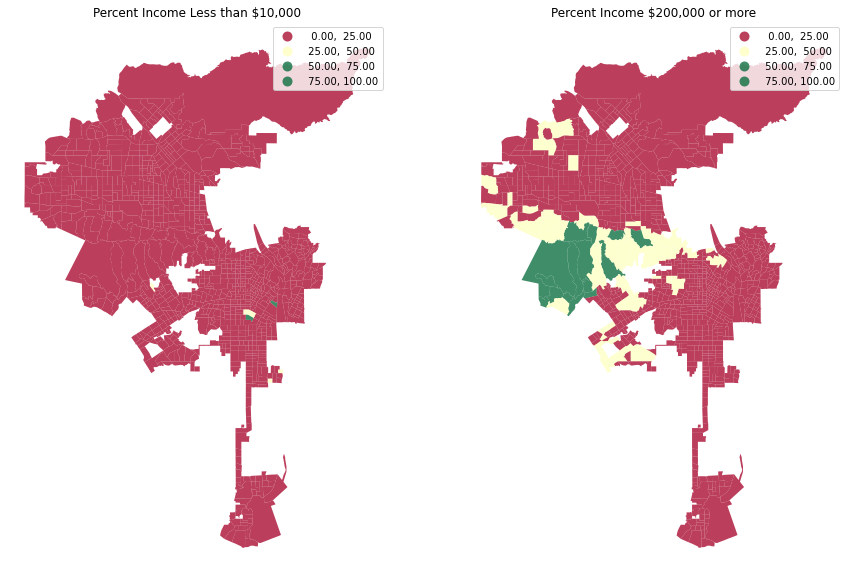

In [88]:
fig, axs = plt.subplots(1, 2, figsize=(15, 12))


ax1, ax2 = axs

# percent income less than $10,000 on the left
gdf.plot(column='Percent Less than $10,000', 
            cmap='RdYlGn', 
            scheme='user_defined',
            classification_kwds={'bins':[25,50,75,100]},
            edgecolor='white', 
            linewidth=0., 
            alpha=0.75, 
            ax=ax1,
            legend=True
           )

ax1.axis("off")
ax1.set_title("Percent Income Less than $10,000")

# percent income $200,000 or more the right
gdf.plot(column='Percent $200,000 or more', 
            cmap='RdYlGn', 
            scheme='user_defined',
            classification_kwds={'bins':[25,50,75,100]},
            edgecolor='white', 
            linewidth=0., 
            alpha=0.75, 
            ax=ax2,
            legend=True
           )

ax2.axis("off")
ax2.set_title("Percent Income $200,000 or more")

Using the [25,75,50,100] bins does not clearly present the lowest income and highest income areas in LA City. There is alot of overlap in census tracts that have household incomes falling under 200,000 and over 10,000. I want to represent what is the average household income of each census tract and so I will have to combine some of the income ranges.

In [89]:
gdf['Percent Less than $24,999'] = (gdf['Less than $10,000']+gdf['$10,000 to $14,999']+ gdf['$15,000 to $19,999']+gdf['$20,000 to $24,999'])/gdf['Total']*100
gdf['Percent $25,000 to $49,999'] = (gdf['$25,000 to $29,999']+gdf['$30,000 to $34,999']+gdf['$35,000 to $39,999']+gdf['$40,000 to $44,999']+gdf['$45,000 to $49,999'])/gdf['Total']*100 
gdf['Percent $50,000 to $59,999'] = gdf['$50,000 to $59,999']/gdf['Total']*100
gdf['Percent $60,000 to $99,999'] = (gdf['$60,000 to $74,999']+gdf['$75,000 to $99,999'])/gdf['Total']*100  
gdf['Percent $100,000 to $199,999'] = (gdf['$100,000 to $124,999']+gdf['$125,000 to $149,999']+gdf['$150,000 to $199,999'])/gdf['Total']*100
gdf['Percent $200,000 or more'] = gdf['$200,000 or more']/gdf['Total']*100

In [90]:
gdf.sample()

,geoid,name,Total,"Less than $10,000","$10,000 to $14,999","$15,000 to $19,999","$20,000 to $24,999","$25,000 to $29,999","$30,000 to $34,999","$35,000 to $39,999","$40,000 to $44,999","$45,000 to $49,999","$50,000 to $59,999","$60,000 to $74,999","$75,000 to $99,999","$100,000 to $124,999","$125,000 to $149,999","$150,000 to $199,999","$200,000 or more",geometry,"Percent Less than $10,000","Percent $15,000 to $19,999","Percent $20,000 to $24,999","Percent $30,000 to $34,999","Percent $40,000 to $44,999","Percent $50,000 to $59,999","Percent $60,000 to $74,999","Percent $75,000 to $99,999","Percent $100,000 to $124,999","Percent $125,000 to $149,999","Percent $150,000 to $199,999","Percent $200,000 or more","Percent Less than $24,999","Percent $30,000 to $59,999","Percent $60,000 to $99,999","Percent $100,000 to $199,999","Percent $10,000 to $14,999","Percent $25,000 to $29,999","Percent $35,000 to $39,999","Percent $45,000 to $49,999","Percent $25,000 to $49,999"
61,14000US06037108102,"Census Tract 1081.02, Los Angeles, CA",1217.0,45.0,43.0,22.0,24.0,20.0,11.0,44.0,9.0,47.0,65.0,120.0,157.0,131.0,112.0,199.0,168.0,"MULTIPOLYGON (((-118.56352 34.28295, -118.5632...",3.697617,1.807724,1.972062,0.903862,0.739523,5.341002,9.860312,12.900575,10.764174,9.202958,16.351684,13.804437,11.010682,6.984388,22.760887,36.318817,3.533279,1.643385,3.615448,3.861956,10.764174


I chose the following ranges, based on the median income in California:  

    - Less than 24,999 = 20th percentile
    
    - 25,000 - 49,999 = 40th percentile
    
    - 50,000 - 59,000 = median 
    
    - 100,000 - 199,999 
    
    - 200,000 or more = 90th percentile

Text(0.5, 1.0, 'Percent Income $200,000 or more')

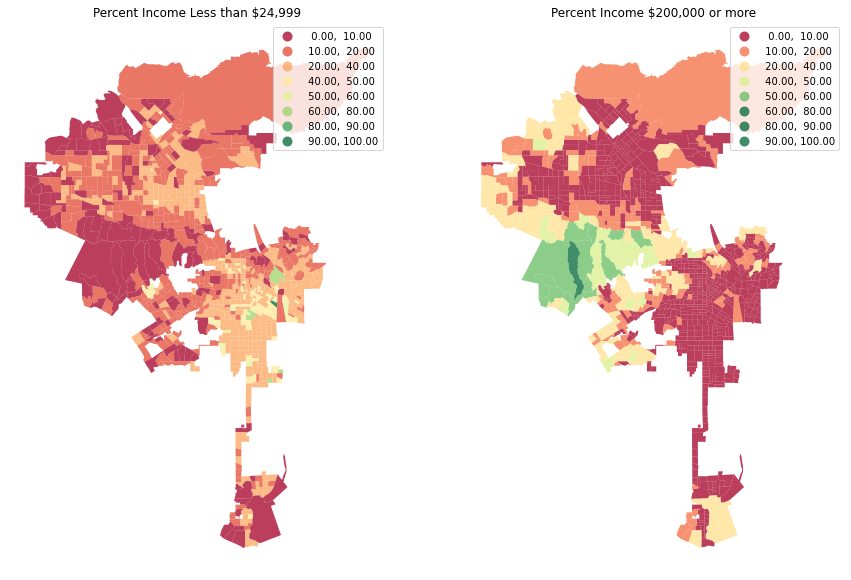

In [98]:
fig, axs = plt.subplots(1, 2, figsize=(15, 12))


ax1, ax2 = axs

# percent income less than $10,000 on the left
gdf.plot(column='Percent Less than $24,999', 
            cmap='RdYlGn', 
            scheme='user_defined',
            classification_kwds={'bins':[10,20,40,50,60,80,90,100]},
            edgecolor='white', 
            linewidth=0., 
            alpha=0.75, 
            ax=ax1,
            legend=True
           )

ax1.axis("off")
ax1.set_title("Percent Income Less than $24,999")

# percent income $200,000 or more the right
gdf.plot(column='Percent $200,000 or more', 
            cmap='RdYlGn', 
            scheme='user_defined',
            classification_kwds={'bins':[10,20,40,50,60,80,90,100]},
            edgecolor='white', 
            linewidth=0., 
            alpha=0.75, 
            ax=ax2,
            legend=True
           )

ax2.axis("off")
ax2.set_title("Percent Income $200,000 or more")

On the left we have a subplot showing where household income is less than 24,999. For this subplot, we need to focus on the areas ranging from green - dark green as the poorest areas in LA City. 

The subplot on the right shows household income of 200,000 of more. For this subplot, we also need to look at the areas ranging from green - dark green as the wealthiest areas in LA City. 

If we we superimpose the two images, we can see that the areas in the left subplot colored dark red (indicating the households with income of 24,999 or less is below 10%) are the same areas shaded in yellow/green on the subplot on the left (indicating the households with income of 200,000 or more is greater than 50%).

### Mapping census tracts with more than 60% of household income less than $24,999.

In [151]:
gdf[gdf['Percent Less than $24,999']> 60]

,geoid,name,Total,"Less than $10,000","$10,000 to $14,999","$15,000 to $19,999","$20,000 to $24,999","$25,000 to $29,999","$30,000 to $34,999","$35,000 to $39,999","$40,000 to $44,999","$45,000 to $49,999","$50,000 to $59,999","$60,000 to $74,999","$75,000 to $99,999","$100,000 to $124,999","$125,000 to $149,999","$150,000 to $199,999","$200,000 or more",geometry,"Percent Less than $10,000","Percent $15,000 to $19,999","Percent $20,000 to $24,999","Percent $30,000 to $34,999","Percent $40,000 to $44,999","Percent $50,000 to $59,999","Percent $60,000 to $74,999","Percent $75,000 to $99,999","Percent $100,000 to $124,999","Percent $125,000 to $149,999","Percent $150,000 to $199,999","Percent $200,000 or more","Percent Less than $24,999","Percent $30,000 to $59,999","Percent $60,000 to $99,999","Percent $100,000 to $199,999","Percent $10,000 to $14,999","Percent $25,000 to $29,999","Percent $35,000 to $39,999","Percent $45,000 to $49,999","Percent $25,000 to $49,999"
536,14000US06037206300,"Census Tract 2063, Los Angeles, CA",2433.0,1266.0,789.0,55.0,83.0,82.0,88.0,0.0,0.0,18.0,0.0,35.0,17.0,0.0,0.0,0.0,0.0,"MULTIPOLYGON (((-118.25041 34.04326, -118.2490...",52.034525,2.260584,3.411426,3.616934,0.000000,0.000000,1.438553,0.698726,0.000000,0.000000,0.0,0.000000,90.135635,3.616934,2.137279,0.000000,32.429100,3.370325,0.000000,0.739827,7.727086
683,14000US06037221820,"Census Tract 2218.20, Los Angeles, CA",914.0,398.0,137.0,34.0,9.0,24.0,15.0,20.0,42.0,0.0,27.0,80.0,66.0,23.0,0.0,0.0,39.0,"MULTIPOLYGON (((-118.28882 34.03276, -118.2874...",43.544858,3.719912,0.984683,1.641138,4.595186,2.954048,8.752735,7.221007,2.516411,0.000000,0.0,4.266958,63.238512,9.190372,15.973742,2.516411,14.989059,2.625821,2.188184,0.000000,11.050328
691,14000US06037222700,"Census Tract 2227, Los Angeles, CA",135.0,70.0,9.0,10.0,0.0,4.0,9.0,4.0,0.0,0.0,5.0,0.0,8.0,16.0,0.0,0.0,0.0,"MULTIPOLYGON (((-118.29154 34.02550, -118.2912...",51.851852,7.407407,0.000000,6.666667,0.000000,3.703704,0.000000,5.925926,11.851852,0.000000,0.0,0.000000,65.925926,10.370370,5.925926,11.851852,6.666667,2.962963,2.962963,0.000000,12.592593
700,14000US06037224700,"Census Tract 2247, Los Angeles, CA",949.0,431.0,78.0,61.0,47.0,27.0,55.0,14.0,11.0,33.0,55.0,33.0,39.0,32.0,17.0,0.0,16.0,"MULTIPOLYGON (((-118.28391 34.02389, -118.2838...",45.416228,6.427819,4.952582,5.795574,1.159115,5.795574,3.477345,4.109589,3.371970,1.791359,0.0,1.685985,65.015806,12.750263,7.586934,5.163330,8.219178,2.845100,1.475237,3.477345,14.752371
817,14000US06037242100,"Census Tract 2421, Los Angeles, CA",751.0,189.0,153.0,86.0,50.0,67.0,74.0,33.0,0.0,17.0,13.0,16.0,28.0,10.0,0.0,0.0,15.0,"MULTIPOLYGON (((-118.23675 33.94491, -118.2367...",25.166445,11.451398,6.657790,9.853529,0.000000,1.731025,2.130493,3.728362,1.331558,0.000000,0.0,1.997337,63.648469,11.584554,5.858855,1.331558,20.372836,8.921438,4.394141,2.263648,25.432756
820,14000US06037242600,"Census Tract 2426, Los Angeles, CA",1381.0,392.0,230.0,177.0,105.0,49.0,56.0,76.0,47.0,56.0,69.0,52.0,24.0,26.0,22.0,0.0,0.0,"MULTIPOLYGON (((-118.25425 33.93097, -118.2542...",28.385228,12.816799,7.603186,4.055033,3.403331,4.996379,3.765387,1.737871,1.882694,1.593049,0.0,0.000000,65.459812,12.454743,5.503259,3.475742,16.654598,3.548154,5.503259,4.055033,20.564808
991,14000US06037980010,"Census Tract 9800.10, Los Angeles, CA",56.0,14.0,5.0,11.0,6.0,0.0,3.0,0.0,5.0,0.0,0.0,0.0,0.0,4.0,4.0,0.0,4.0,"MULTIPOLYGON (((-118.25165 34.08038, -118.2515...",25.000000,19.642857,10.714286,5.357143,8.928571,0.000000,0.000000,0.000000,7.142857,7.142857,0.0,7.142857,64.285714,14.285714,0.000000,14.285714,8.928571,0.000000,0.000000,0.000000,14.285714


<AxesSubplot:>

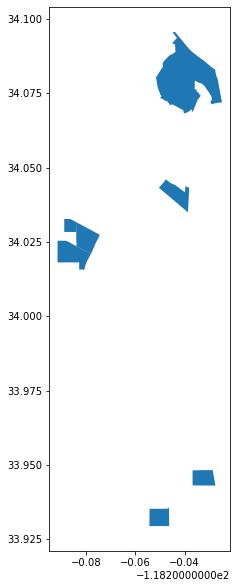

In [152]:
gdf[gdf['Percent Less than $24,999'] >60].plot(figsize=(12,10))

Add basemap

In [144]:
gdf_web_mercator= gdf.to_crs(epsg=3857)

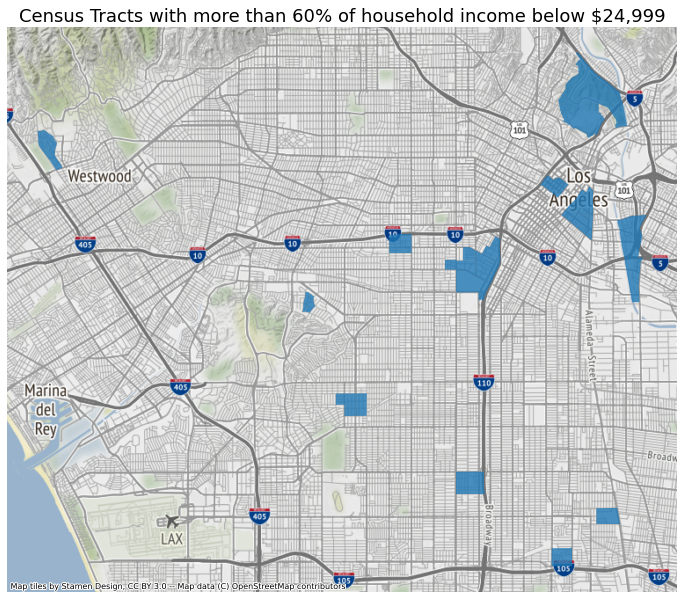

In [153]:
fig, ax = plt.subplots(figsize=(12, 15))

gdf_web_mercator[gdf_web_mercator['Percent Less than $24,999'] > 50].plot(ax=ax, alpha=0.80)

ax.axis('off')

ax.set_title('Census Tracts with more than 60% of household income below $24,999',fontsize=18)

ctx.add_basemap(ax)